In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats                 

In [81]:
cab = pd.read_csv('Cab_Data.csv')
customer = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [82]:
cab.shape

(359392, 7)

In [ ]:
cab.head( )  #print(cab.head)

In [ ]:
cab.tail()   #print(cab.tail)

In [ ]:
cab.info()   #cab.dtypes

In [ ]:
type(cab)    #print(type(cab))

In [66]:
#cab          #cab [2:5]                       #doubt = 0
              #print(cab[2:5])

In [ ]:
cab.columns                             

In [ ]:
cab['Date of Travel']     #cab[cab['Date of Travel']==42380]
                          #cab[cab ['KM Travelled']<30]
                          #cab.drop(['KM Travelled'],axis=1)
                          #print (cab)

In [ ]:
cab['Date of Travel'].min()

In [ ]:
cab['Date of Travel'].max()

In [91]:
#Time period of data is till 31/12/2018 from 31/01/2016                #doubt = 1
import datetime
datetime.date(2016,1,31)-datetime.timedelta(days=42371)
datetime.date(1899,12,29)+datetime.timedelta(days=42371)

datetime.date(2016, 1, 1)

In [ ]:
from datetime import datetime, timedelta
def dateReformation(dateInt):
    date=datetime.strftime(datetime(1899,12,29)+timedelta(days=dateInt),'%d-%m-%Y')
    return date

dateReformation(42371)

In [93]:
cab['Date of Travel']=cab['Date of Travel'].apply(lambda dt: dateReformation(dt))

In [ ]:
cab.describe(include='all')

In [ ]:
cab['Date of Travel'].min()

In [ ]:
cab['Date of Travel'].max()

In [101]:
cabdate = cab.set_index('Date of Travel')

In [ ]:
cabdate

In [ ]:
#cities
city.head()

In [ ]:
city.shape

In [ ]:
# displays unique cities names count
city.nunique()

In [ ]:
city.info()

In [ ]:
#replace "," with space for numbers in population
city['Population']=city['Population'].str.replace(",","")
city['Users']=city['Users'].str.replace(",","")           
city

In [ ]:
#Converting population and users to numeric values                           #doubt = 2
city['Population']=pd.to_numeric(city['Population'])
city['Users']=pd.to_numeric(city['Users'])
city

In [ ]:
city.info()

In [ ]:
#customers data 
customer.head()

In [ ]:
customer.shape

In [ ]:
customer.info()

In [ ]:
customer.describe()

In [ ]:
#Transactions data
transaction.head()

In [ ]:
transaction.shape

In [ ]:
transaction.info()

In [ ]:
transaction.describe()

In [118]:
#merging datas
#The city and cab dataset are related ,
#City Name in the city dataset is related to the city Name in the cab dataset.
merged_data=pd.merge(city,cab)

In [ ]:
merged_data

In [ ]:
#cab.shape
#city.shape
#merged_data.shape

In [128]:
#The customers dataset and transactions datasets are related through the Customer ID
merged_data = pd.merge(merged_data, transaction)

In [ ]:
merged_data

In [ ]:
merged_data.shape

In [131]:
#The tranactions dataset and the customer datasest are related through the Transaction ID
merged_data = pd.merge(merged_data,customer )

In [ ]:
merged_data

In [ ]:
merged_data.shape

In [ ]:
#replace "," with space for numbers in population
#city['Population']=city['Population'].str.replace(",","")
#city['Users']=city['Users'].str.replace(",","")           
#city

In [ ]:
merged_data.columns=merged_data.columns.str.replace(" ","_")            #doubt = 3
merged_data

In [ ]:
#find duplicates
merged_data[merged_data.duplicated()]                                   #doubt = 4

In [ ]:
merged_data.isnull().sum().sort_values(ascending=False)                 #doubt = 5

In [ ]:
#feature transformation                                                 #doubt = 6
#returns month of date
merged_data['Month']=pd.DatetimeIndex(merged_data['Date_of_Travel']).month
#returns day of datetime
merged_data['Day']=pd.DatetimeIndex(merged_data['Date_of_Travel']).day
#returns year of datetime
merged_data['Year']=pd.DatetimeIndex(merged_data['Date_of_Travel']).year
#returns week of datetime
merged_data['Year_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).week
#returns day week of date time with Monday=0 and sunday=6
merged_data['Day_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).dayofweek
#returns quarter of date time
merged_data['Quarter']=pd.DatetimeIndex(merged_data['Date_of_Travel']).quarter

merged_data

In [ ]:
#generating a new profit column from subtracting the price charged -cost of trip
merged_data['Profit']=merged_data['Price_Charged']-merged_data['Cost_of_Trip']
merged_data

In [ ]:
#Column created to check profit from the ride or a loss (1 for profit and 0 for loss)
merged_data['Profited']=merged_data['Profit'].apply(lambda x: 1 if x>1 else 0)
merged_data

In [ ]:
#create a column to generate the price/km and profit/km of each ride
merged_data['Price/KM']=merged_data['Price_Charged']/merged_data['KM_Travelled']
merged_data['Profit/KM']=merged_data['Profit']/merged_data['KM_Travelled']
merged_data

In [ ]:
# consider only numerical data
#select all the numerical columns
numerical_cols=merged_data.select_dtypes(exclude='object')
numerical_cols

In [ ]:
#drop the date of Travel column
date_cols=numerical_cols.pop('Date_of_Travel')
date_cols

In [ ]:
#consider only object columns
object_cols=merged_data.select_dtypes(include='object')
object_cols

In [158]:
# visualise data
from scipy import stats
import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme()

In [156]:
#function to get quartile and descriptive statistics
def numericalAnalysis(datar,col):
    print(f"Quantile statistics of the column:{col}")
    print(f"Quantile1 is: {np.quantile(datar[col],.25)} ")
    print(f"Quantile2 is: {np.quantile(datar[col],.50)}")
    print(f"Quantile3 is: {np.quantile(datar[col],.75)}\n")
    print(f"The skewness of the column is {stats.skew(datar[col])}")
    print(f"The kurtosis of the column is {stats.kurtosis(datar[col])}\n")
    pprint.pprint(merged_data[col].describe())
    print("\n")

In [ ]:
numericalAnalysis(numerical_cols,"KM_Travelled")

In [ ]:
#function to plot a boxplot and histogram of the distribution

def vizHist(datar,col,c):# plt.figure(figsize=(10,8))
    sns.histplot(x=datar[col],bins=40 , color=c ,kde=True )
    plt.title("Histogram of {}".format(col), fontsize=20)
    plt.ylabel('Frequency')
    plt.xlabel(col)

def boxPlot(datar,col):# plt.figure(figsize=(10,8))
    print("Boxplot of {}".format(col))
    sns.boxplot(datar[col])

In [ ]:
sns.distplot(merged_data['KM_Travelled'])

In [ ]:
vizHist(numerical_cols,"KM_Travelled",'r')

In [ ]:
boxPlot(numerical_cols,'KM_Travelled')

In [ ]:
#check for pricecharged
numericalAnalysis(merged_data,"Price_Charged")

In [ ]:
sns.displot(merged_data['Price_Charged'])

In [ ]:
boxPlot(merged_data,'Price_Charged')

In [ ]:
numericalAnalysis(merged_data,"Cost_of_Trip")

In [ ]:
sns.displot(merged_data['Cost_of_Trip'])

In [ ]:
boxPlot(merged_data,'Cost_of_Trip')

In [ ]:
vizHist(merged_data,"Cost_of_Trip",'g')

In [ ]:
# Age
numericalAnalysis(merged_data,"Age")

In [ ]:
sns.displot(merged_data['Age'])

In [ ]:
boxPlot(merged_data,'Age')

In [ ]:
vizHist(merged_data,'Age','r')

In [ ]:
#income
numericalAnalysis(merged_data,'Income_(USD/Month)')

In [ ]:
boxPlot(merged_data,'Income_(USD/Month)')

In [ ]:
vizHist(merged_data, 'Income_(USD/Month)','b')

In [ ]:
#population
numericalAnalysis(city,'Population')

In [ ]:
boxPlot(city, 'Population')

In [ ]:
sns.distplot(city['Population'])

In [ ]:
numericalAnalysis(city,'Users')

In [ ]:
sns.distplot(city['Users'])

In [ ]:
boxPlot(city,'Users')

In [ ]:
merged_data.info()

In [ ]:
plotter = merged_data.groupby(["Day_week","Company"]).Transaction_ID.count()
plotter.unstack().plot(kind="line")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.ylabel("No.of Customers")
plt.title("Week Analysis")

In [ ]:
plot1= merged_data.groupby(["Day","Company"]).Transaction_ID.count()
plotter.unstack().plot(kind="line")
plt.xticks()
plt.ylabel("No.of Customers")
plt.title("Day analysis")

In [ ]:
plot1=merged_data.groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Monthly Analysis")
plt.ylabel("No.of Customers")
plt.show()

In [ ]:
plotter = merged_data.groupby(["Month","Company"]).Transaction_ID.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks(range(1,12))
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

In [ ]:
plotter = merged_data.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(20,10))
plotter.unstack().plot(kind="bar")
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

In [ ]:
#Year vs Users vs Company
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Year'],y=merged_data['Users'],hue=merged_data['Company'],estimator=sum)

In [ ]:
merged_data.groupby(["Year","Company"]).Transaction_ID.count()

In [ ]:
#yellow cab monthly transaction id count is plotted
plot= merged_data[merged_data.Company == "Yellow Cab"].groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title("Customers Analysis for Yellow cab")
plt.ylabel("Number Of Customers")

In [ ]:
plot1= merged_data[merged_data.Company == "Pink Cab"].groupby("Day").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.lineplot(x=plot1.index,y=plot1.values)
plt.title("Customers Analysis for Pink cab")
plt.ylabel("Number Of Rides")

In [ ]:
plot2 =merged_data.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Yearly Customer distribution")

In [ ]:
#Company Analysis
plot3=merged_data.groupby("Company").Transaction_ID.count()
plt.figure(figsize=(10,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
plot4= merged_data[merged_data.Company=="Pink Cab"].groupby("Month").Transaction_ID.count()
print("Pink cab monthly transaction info :", plot4)
plot5= merged_data[merged_data.Company=="Yellow Cab"].groupby("Month").Transaction_ID.count()
print("Yellow cab monthly transaction info :", plot5)

In [ ]:
plt.figure(figsize=(14,6))
ax =plt.subplot(111)
ax.bar(plot4.index-0.2,plot4.values,width=0.4,color="Pink",align="center",label="Pink Cab")
ax.bar(plot5.index+0.2,plot5.values,width=0.4,color="Yellow",align="center",label="Yellow Cab")
plt.title("Transactions Per month ")
plt.ylabel("No. of Transactions")
#locs, labels = plt.xticks()
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=20)
plt.xlabel("Month")
plt.legend()

In [ ]:
#customer gender analysis
#Company Analysis
plot3=merged_data.groupby("Gender").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Company'],y=merged_data['Users'],hue=merged_data['Gender'],estimator=sum)

In [ ]:
#Company Analysis
plot3=merged_data.groupby("Payment_Mode").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
sns.scatterplot(y=city['Users'],x=city['Population'])

In [ ]:
merged_data.Profit.max()

In [ ]:
merged_data.Profit.min()

In [ ]:
sns.scatterplot(x=merged_data['KM_Travelled'],y=merged_data["Profit"])

In [ ]:
sns.scatterplot(x=merged_data['KM_Travelled'],y=merged_data["Profit"],hue=merged_data['Company'])

In [ ]:
merged_data.groupby(['Gender'])['Income_(USD/Month)'].mean()

In [ ]:
sns.catplot(x="Gender", y="Income_(USD/Month)", data=merged_data)

In [ ]:
#Age vs Income
sns.scatterplot(x=merged_data["Age"],y=merged_data["Income_(USD/Month)"])

In [ ]:
#income vs kms travelled
sns.scatterplot(x=merged_data["Income_(USD/Month)"],y=merged_data['KM_Travelled'])

In [ ]:
#Quarter vs profit
merged_data.groupby(['Quarter'])["Profit"].mean()

In [ ]:
merged_data.groupby(['Quarter','Year'])["Profit"].sum()

In [ ]:
#Quarters vs KM Travelled
merged_data.groupby(['Quarter'])['KM_Travelled'].median()

In [ ]:
merged_data.groupby(['Quarter'])['KM_Travelled'].mean()

In [ ]:
merged_data.groupby(['Quarter'])['KM_Travelled'].sum()

In [ ]:
quarterDistance=merged_data.groupby('Quarter')['KM_Travelled'].sum()
quarterDistance=pd.DataFrame(quarterDistance)
quarterDistance=quarterDistance.sort_values(by='KM_Travelled',ascending=False)
# plt.figure(figsize=(10,10))

quarterDistance.plot.bar(color='green',linewidth=1.5,figsize=(8,8))
plt.xticks()
plt.ylabel('KM Travelled')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Quarter")

In [ ]:
merged_data.groupby(['KM_Travelled','Company'])['Users'].count()

In [ ]:
merged_data.info()

In [ ]:
merged_data.groupby(['Day_week'])['KM_Travelled'].median()

In [ ]:
merged_data.groupby(['Day_week'])['KM_Travelled'].sum()

In [ ]:
dayDistance=merged_data.groupby('Day_week')['KM_Travelled'].sum()
dayDistance=pd.DataFrame(dayDistance)
dayDistance=dayDistance.sort_values(by='KM_Travelled',ascending=False)
# plt.figure(figsize=(10,10))

dayDistance.plot.bar(color='blue',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Number of KMs')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Day")

In [ ]:
sns.barplot(x="Day_week", y="Profit", data=merged_data)

In [ ]:
merged_data.groupby(['Day_week','Users'])['Profit'].sum()

In [ ]:
sns.catplot(x="Company", y="Profit", data=merged_data)

In [ ]:
merged_data.groupby(['Company'])['Profit'].mean()

In [ ]:
merged_data.groupby(['Company'])['Profit'].sum()

In [ ]:
#monthly profit
merged_data.groupby(['Month'])['Profit'].sum()

In [ ]:
sns.barplot(x="Year",y= 'Profit', data = merged_data)

In [ ]:
sns.barplot(x="Month", y="Profit", data=merged_data)

In [ ]:
monthRev=merged_data.groupby('Month')['Price_Charged'].sum()
monthRev=pd.DataFrame(monthRev)
monthRev=monthRev.sort_values(by='Price_Charged',ascending=False)
# plt.figure(figsize=(10,10))

monthRev.plot.bar(color='seagreen',linewidth=1,figsize=(8,8))
plt.xticks(rotation=90)
plt.ylabel('Revenue in $Millions')
plt.xlabel("Month")
plt.title("Revenue Per Month")

In [ ]:
#revenue permonth for yellow cab
yellowCab=merged_data[merged_data['Company']=="Yellow Cab"]
sns.barplot(x=yellowCab['Month'],y=yellowCab['Cost_of_Trip'],estimator=sum)
plt.title("Revenue Per Month for YellowCab")

In [ ]:
#revenue per month for pink cab
PinkCab=merged_data[merged_data['Company']=="Pink Cab"]
sns.barplot(x=PinkCab['Month'],y=PinkCab['Cost_of_Trip'],estimator=sum)
plt.title("Revenue Per Month for Pink cab")

In [ ]:
#city vs profit
merged_data.groupby(['City'])['Profit'].sum().sort_values(ascending=False)

In [ ]:
merged_data.groupby(['Company'])['Profit/KM'].sum().sort_values(ascending=False)

In [ ]:
cityProfit=merged_data.groupby('City').Profit.sum()
cityProfit=pd.DataFrame(cityProfit)
cityProfit=cityProfit.sort_values(by='Profit',ascending=False)
plt.figure(figsize=(8,8))

cityProfit.plot.bar(color='red',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Cities")
plt.title("Proifits per each City")

In [ ]:
plt.figure(figsize=(30,7))
sns.barplot(x=merged_data["City"],y=merged_data['Profit'],estimator=sum)
plt.xticks()

In [ ]:
#profit per city for each company
sns.barplot(x=yellowCab['City'],y=yellowCab['Profit'],estimator=sum)
plt.xticks()
plt.title("Profits Per Month for Yellow Company")

In [ ]:
sns.barplot(x=PinkCab['City'],y=PinkCab['Profit'],estimator=sum)
plt.xticks()
plt.title("Profit for Pink Company")

In [ ]:
merged_data.groupby(['Year'])['Profit'].sum()

In [ ]:
data2016=merged_data.loc[merged_data['Year']==2016]
data2017=merged_data.loc[merged_data['Year']==2017]
data2018=merged_data.loc[merged_data['Year']==2018]
profit2016=round(data2016['Profit'].sum())
profit2017=round(data2017['Profit'].sum())
profit2018=round(data2018['Profit'].sum())
# sns.lineplot(x=data['Year'],y=data['Profit'])

In [ ]:
pd1=pd.DataFrame(data=[profit2018,profit2017,profit2016],columns=["Profit"],index=[2018,2017,2016])
pd1

,Profit
2018,15034565
2017,18479368
2016,15813769


<AxesSubplot:ylabel='Profit'>

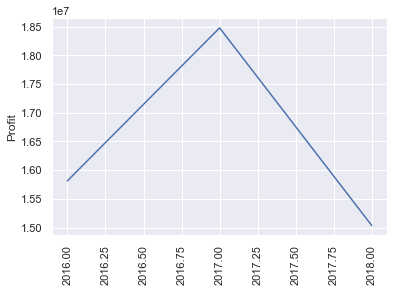

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(y=pd1['Profit'],x=pd1.index)

Text(0.5, 1.0, 'Proifits per Year')

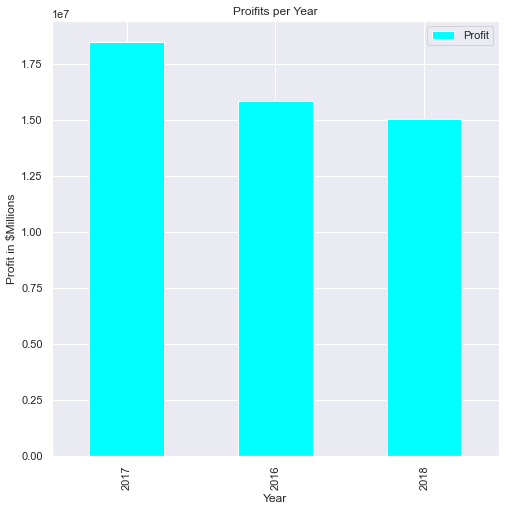

In [ ]:
yearlyProfit=merged_data.groupby('Year').Profit.sum()
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Profit',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot.bar(color='cyan',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

Text(0.5, 1.0, 'Proifits per Year')

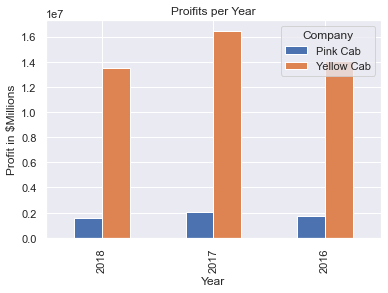

In [ ]:
yearlyProfit=merged_data.groupby(['Year','Company'])['Profit'].sum().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Year',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar')
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

Text(0.5, 1.0, 'Avg Proifits per KM')

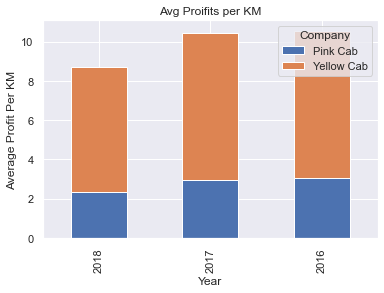

In [ ]:
yearlyProfit=merged_data.groupby(['Year','Company'])['Profit/KM'].mean().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Year',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar',stacked=True)
plt.xticks()
plt.ylabel('Average Profit Per KM')
plt.xlabel("Year")
plt.title("Avg Proifits per KM")

Text(0.5, 1.0, 'Proifits per Year per Gender for each company')

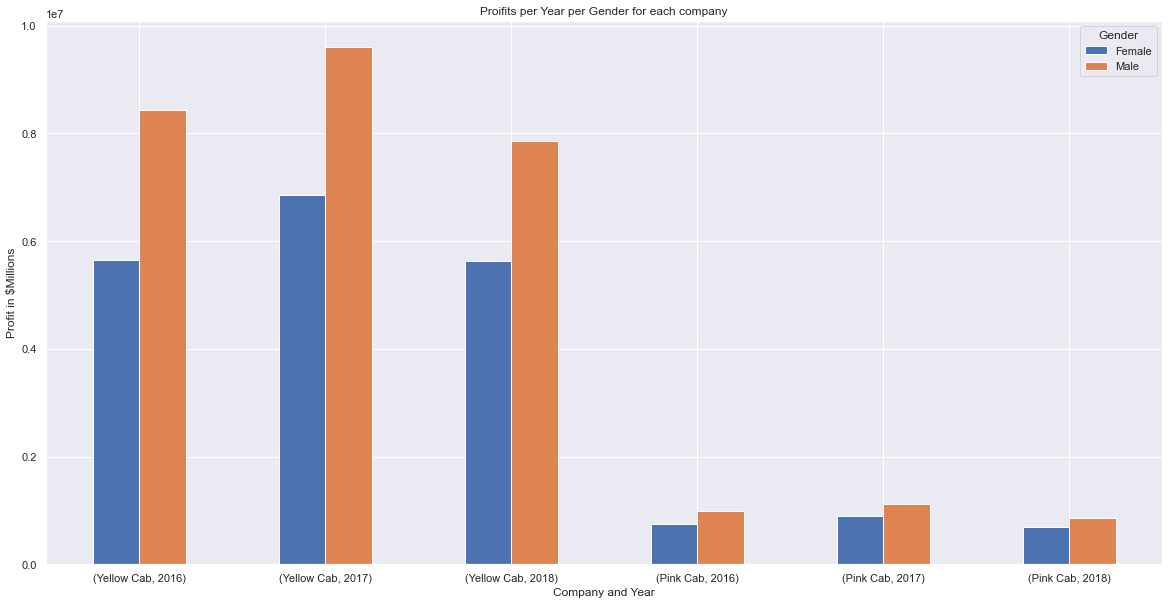

In [ ]:
yearlyProfit=merged_data.groupby(['Company','Year','Gender'])['Profit'].sum().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Company',ascending=False)


yearlyProfit.plot(kind= 'bar',figsize=(20,10))
plt.xticks(rotation = 360)
plt.ylabel('Profit in $Millions')
plt.xlabel("Company and Year")
plt.title("Proifits per Year per Gender for each company")

Text(0.5, 1.0, 'Customer base analysis Year per Gender for each company')

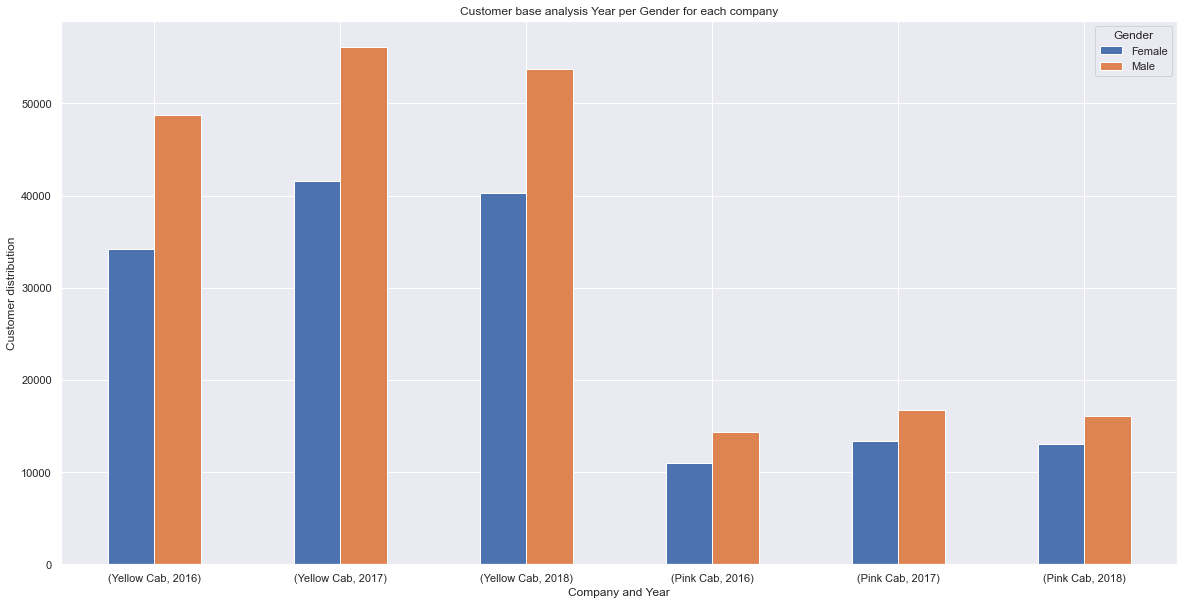

In [ ]:
yearlyProfit=merged_data.groupby(['Company','Year','Gender'])['Gender'].count().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Company',ascending=False)


yearlyProfit.plot(kind= 'bar',figsize=(20,10))
plt.xticks(rotation = 360)
plt.ylabel('Customer distribution')
plt.xlabel("Company and Year")
plt.title("Customer base analysis Year per Gender for each company")

In [ ]:
merged_data.groupby(['Company','Payment_Mode'])['Profit'].sum()

Company     Payment_Mode
Pink Cab    Card            3.180603e+06
            Cash            2.126726e+06
Yellow Cab  Card            2.636208e+07
            Cash            1.765830e+07
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Payment_Mode', ylabel='Profit'>

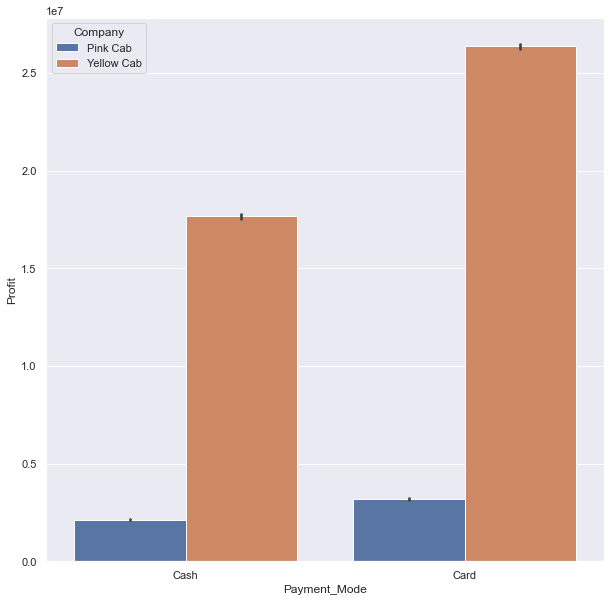

In [ ]:
#profit vs card or cash
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Payment_Mode'])["Profit"].sum()
sns.barplot(x=merged_data['Payment_Mode'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

<AxesSubplot:xlabel='Quarter', ylabel='Profit'>

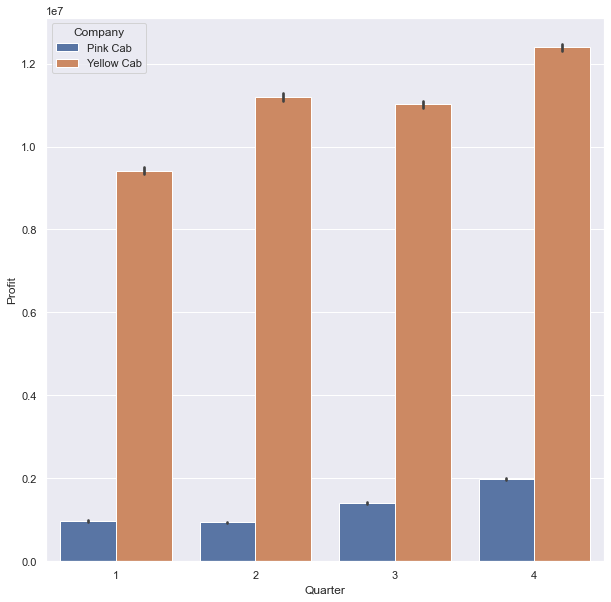

In [ ]:
#profit vs Quarter 
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Quarter'])["Profit"].sum()
sns.barplot(x=merged_data['Quarter'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

<AxesSubplot:xlabel='Day_week', ylabel='Profit'>

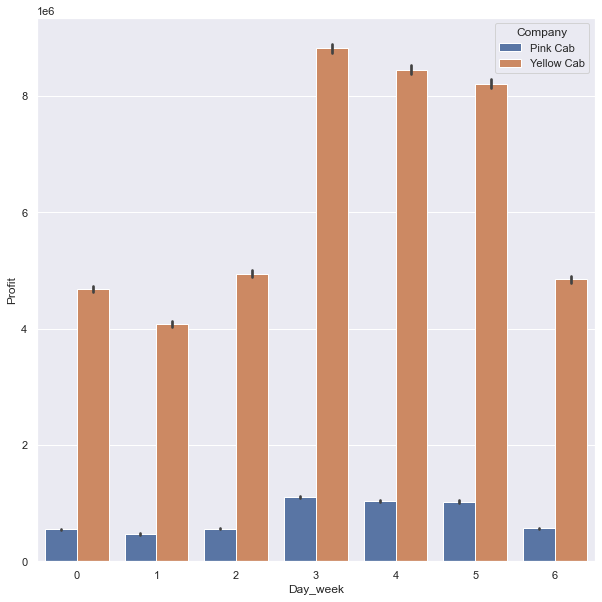

In [ ]:
#profit vs Quarter 
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Day_week'])["Profit"].sum()
sns.barplot(x=merged_data['Day_week'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

<AxesSubplot:xlabel='Company', ylabel='Income_(USD/Month)'>

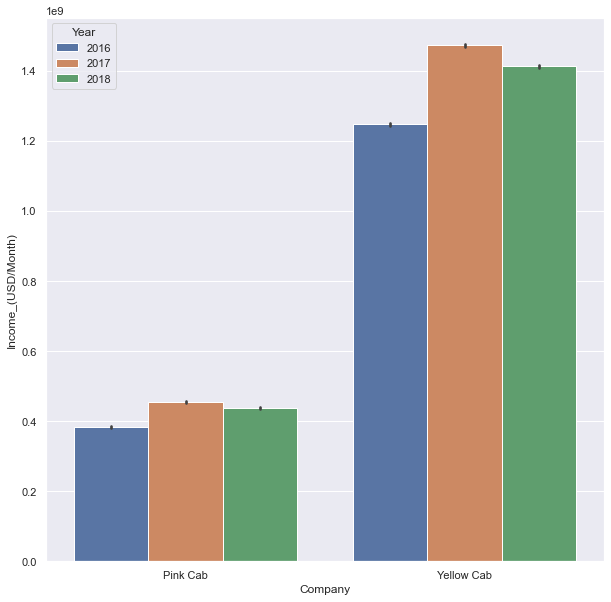

In [ ]:
#Company vs Income vs Year
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Company'],y=merged_data['Income_(USD/Month)'],hue=merged_data['Year'],estimator=sum)

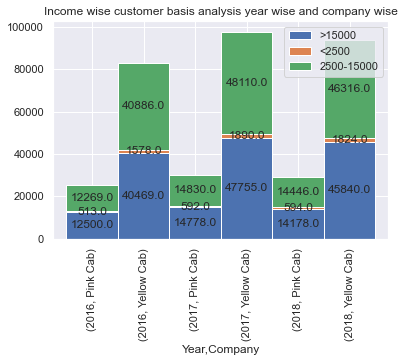

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Income_(USD/Month)']>2500) & (merged_data['Income_(USD/Month)']<15000)].groupby(['Year','Company'])['Company'].count()

data1 = merged_data[(merged_data['Income_(USD/Month)']<2500)].groupby(['Year','Company'])['Company'].count()
data2 = merged_data[(merged_data['Income_(USD/Month)']>15000)].groupby(['Year','Company'])['Company'].count()

df=pd.DataFrame({'>15000':data2, '<2500':data1, '2500-15000':data3})
ax = df.plot(kind='bar', stacked=True, width = 1)
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Income wise customer basis analysis year wise and company wise")

plt.show()

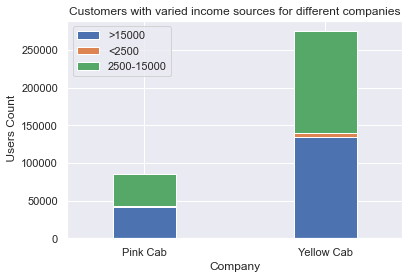

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Income_(USD/Month)']>2500) & (merged_data['Income_(USD/Month)']<15000)].groupby(['Company'])['Users'].count()

data1 = merged_data[(merged_data['Income_(USD/Month)']<2500)].groupby(['Company'])['Users'].count()
data2 = merged_data[(merged_data['Income_(USD/Month)']>15000)].groupby(['Company'])['Users'].count()

df=pd.DataFrame({'>15000':data2, '<2500':data1, '2500-15000':data3})
ax = df.plot(kind='bar', stacked=True, width = 0.35)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=360)
plt.ylabel(' Users Count')
plt.xlabel("Company")
plt.title("Customers with varied income sources for different companies")
plt.show()

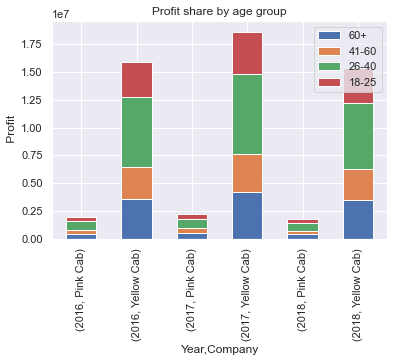

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Age']>18) & (merged_data['Age']<=25)].groupby(['Year','Company'])['Profit'].sum()

data1 = merged_data[(merged_data['Age']>26) & (merged_data['Age']<=40)].groupby(['Year','Company'])['Profit'].sum()
data2 = merged_data[(merged_data['Age']>41) & (merged_data['Age']<=60)].groupby(['Year','Company'])['Profit'].sum()
data4 = merged_data[(merged_data['Age']>41)].groupby(['Year','Company'])['Profit'].sum()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

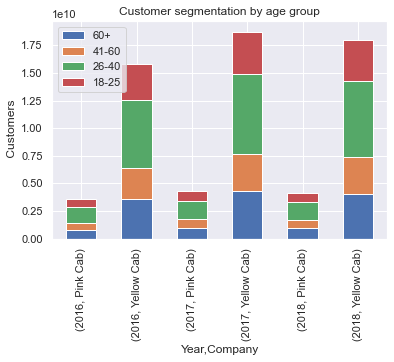

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Age']>18) & (merged_data['Age']<=25)].groupby(['Year','Company'])['Users'].sum()

data1 = merged_data[(merged_data['Age']>26) & (merged_data['Age']<=40)].groupby(['Year','Company'])['Users'].sum()
data2 = merged_data[(merged_data['Age']>41) & (merged_data['Age']<=60)].groupby(['Year','Company'])['Users'].sum()
data4 = merged_data[(merged_data['Age']>41)].groupby(['Year','Company'])['Users'].sum()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Customer segmentation by age group")
plt.ylabel(' Customers')
plt.show()

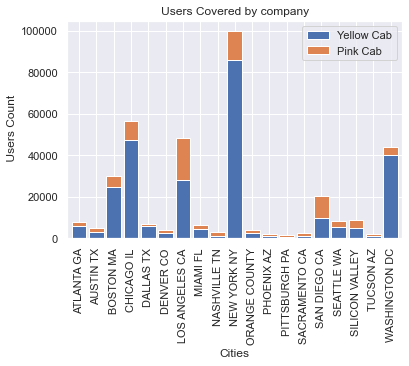

In [ ]:
import pandas as pd
data1 = merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['City'])['Users'].count()
data2 = merged_data[(merged_data['Company']=="Pink Cab")].groupby(['City'])['Users'].count()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.85)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=90)
plt.ylabel(' Users Count')
plt.xlabel("Cities")
plt.title("Users Covered by company")
plt.show()

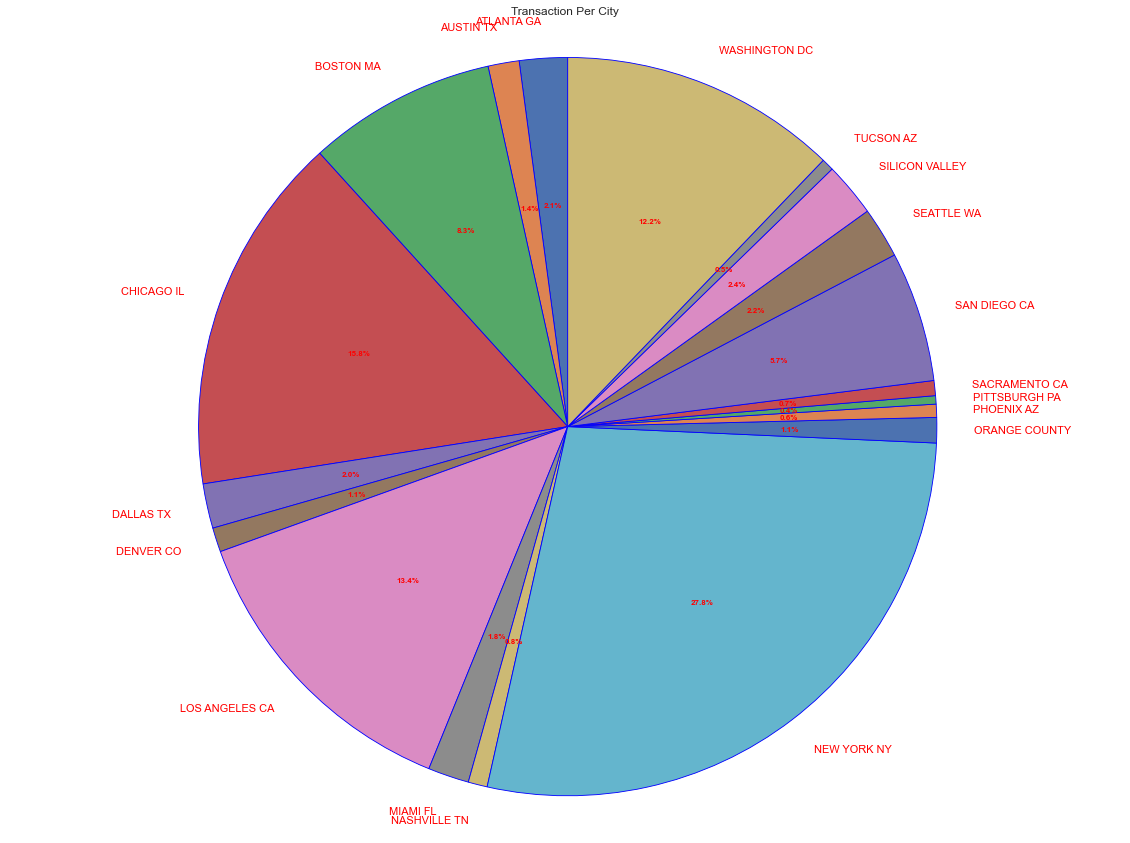

In [ ]:
cities = merged_data.groupby("City").Transaction_ID.count()
labs = cities.index
vals  = cities.values
wp = { 'linewidth' : 0.85, 'edgecolor' : "Blue" }
figp , axs =plt.subplots(figsize=(20,15))
wedges, texts, autotexts = axs.pie(vals,labels=labs,autopct="%1.1f%%",startangle=90,wedgeprops = wp,
                                  textprops = dict(color ="Red"))
  
plt.setp(autotexts, size = 8, weight ="bold")
axs.axis('equal')
plt.title("Transaction Per City")
plt.show()

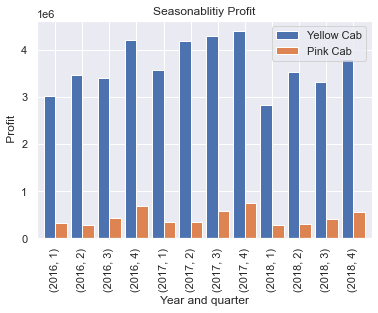

In [ ]:
# merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Year','Quarter'])['Profit'].sum()
    
import pandas as pd
data1 = merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Year','Quarter'])['Profit'].sum()
data2 = merged_data[(merged_data['Company']=="Pink Cab")].groupby(['Year','Quarter'])['Profit'].sum()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=False, width = 0.85)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=90)
plt.ylabel(' Profit')
plt.xlabel("Year and quarter")
plt.title("Seasonablitiy Profit")
plt.show()

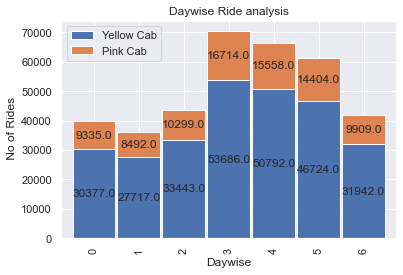

In [ ]:

import pandas as pd
data1 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Day_week'])["Transaction_ID"].count()
data2 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Day_week'])["Transaction_ID"].count()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.95)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
plt.xticks()
plt.ylabel(' No of Rides')
plt.xlabel("Daywise")
plt.title("Daywise Ride analysis")
plt.show()

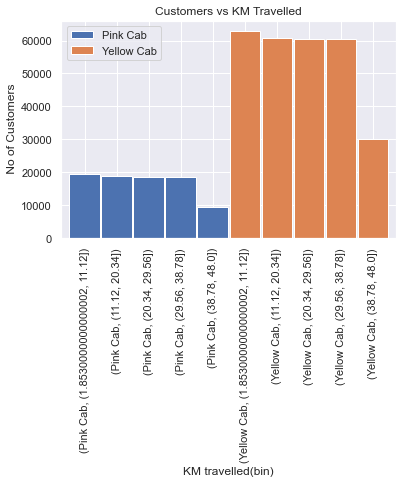

In [ ]:

import pandas as pd
data1 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Company'])["KM_Travelled"].value_counts(bins=5)
data2 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Company'])["KM_Travelled"].value_counts(bins=5)
df=pd.DataFrame({'Pink Cab':data1, 'Yellow Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.95)

plt.xticks()
plt.ylabel(' No of Customers')
plt.xlabel("KM travelled(bin)")
plt.title("Customers vs KM Travelled")
plt.show()

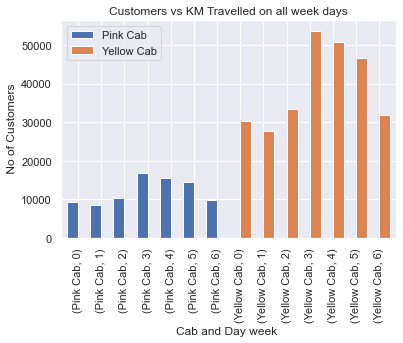

In [ ]:
import pandas as pd
data1 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Company','Day_week'])["KM_Travelled"].count()
data2 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Company','Day_week'])["KM_Travelled"].count()
df=pd.DataFrame({'Pink Cab':data1, 'Yellow Cab':data2})
ax = df.plot(kind='bar', stacked=False, width = 0.95)

plt.xticks()
plt.ylabel(' No of Customers')
plt.xlabel("Cab and Day week ")
plt.title("Customers vs KM Travelled on all week days")
plt.show()

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction_ID      359392 non-null  int64         
 4   Date_of_Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM_Travelled        359392 non-null  float64       
 7   Price_Charged       359392 non-null  float64       
 8   Cost_of_Trip        359392 non-null  float64       
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392 no

In [ ]:
merged_data.groupby(['Year','Company'])['Profit'].sum()

Year  Company   
2016  Pink Cab      1.739883e+06
      Yellow Cab    1.407389e+07
2017  Pink Cab      2.015101e+06
      Yellow Cab    1.646427e+07
2018  Pink Cab      1.552345e+06
      Yellow Cab    1.348222e+07
Name: Profit, dtype: float64

Text(0.5, 1.0, 'City wise profits per company')

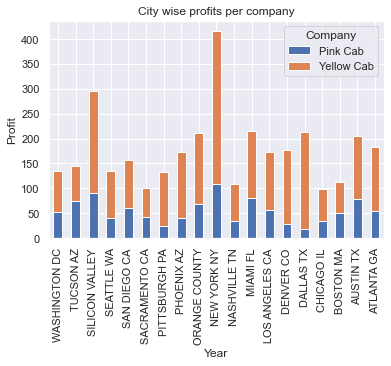

In [ ]:
yearlyProfit=merged_data.groupby(['City','Company'])['Profit'].mean().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='City',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar', stacked= True)
plt.xticks()
plt.ylabel('Profit')
plt.xlabel("Year")
plt.title("City wise profits per company")

In [ ]:
#profit per company per month
merged_data.groupby(['Month','Company'])['Profit'].mean()

Month  Company   
1      Pink Cab       59.431846
       Yellow Cab    176.266030
2      Pink Cab       72.667031
       Yellow Cab    180.784571
3      Pink Cab       64.832096
       Yellow Cab    168.500047
4      Pink Cab       59.232395
       Yellow Cab    174.635166
5      Pink Cab       48.518816
       Yellow Cab    190.123599
6      Pink Cab       49.940337
       Yellow Cab    175.324581
7      Pink Cab       53.202882
       Yellow Cab    145.960108
8      Pink Cab       55.515657
       Yellow Cab    134.693266
9      Pink Cab       64.199885
       Yellow Cab    163.333468
10     Pink Cab       63.096018
       Yellow Cab    142.516613
11     Pink Cab       65.374408
       Yellow Cab    143.367239
12     Pink Cab       84.956324
       Yellow Cab    152.053092
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Day vs No of rides')

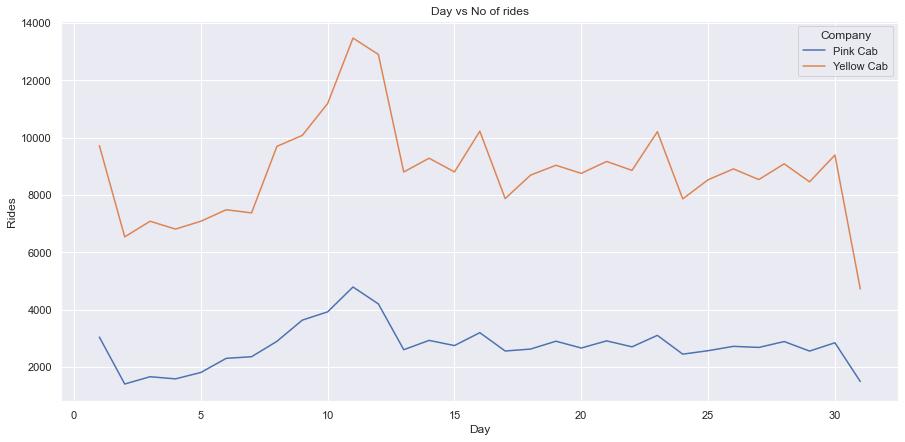

In [ ]:
#day vs rides
fig, ax = plt.subplots(figsize=(15,7))
merged_data.groupby(['Day','Company'])['Users'].count().unstack().plot(ax=ax)
plt.ylabel("Rides")
plt.title("Day vs No of rides")

In [ ]:
merged_data.groupby(['Company','Day_week'])['Profit'].sum().sort_values(ascending=False)

Company     Day_week
Yellow Cab  3           8.820783e+06
            4           8.451216e+06
            5           8.204281e+06
            2           4.944856e+06
            6           4.845078e+06
            0           4.677802e+06
            1           4.076357e+06
Pink Cab    3           1.103807e+06
            4           1.030196e+06
            5           1.025892e+06
            6           5.659513e+05
            2           5.624414e+05
            0           5.472822e+05
            1           4.717588e+05
Name: Profit, dtype: float64

In [ ]:
city['User/Pop']=(city['Users']/city['Population'])*100
city

,City,Population,Users,User/Pop
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


<AxesSubplot:xlabel='City', ylabel='User/Pop'>

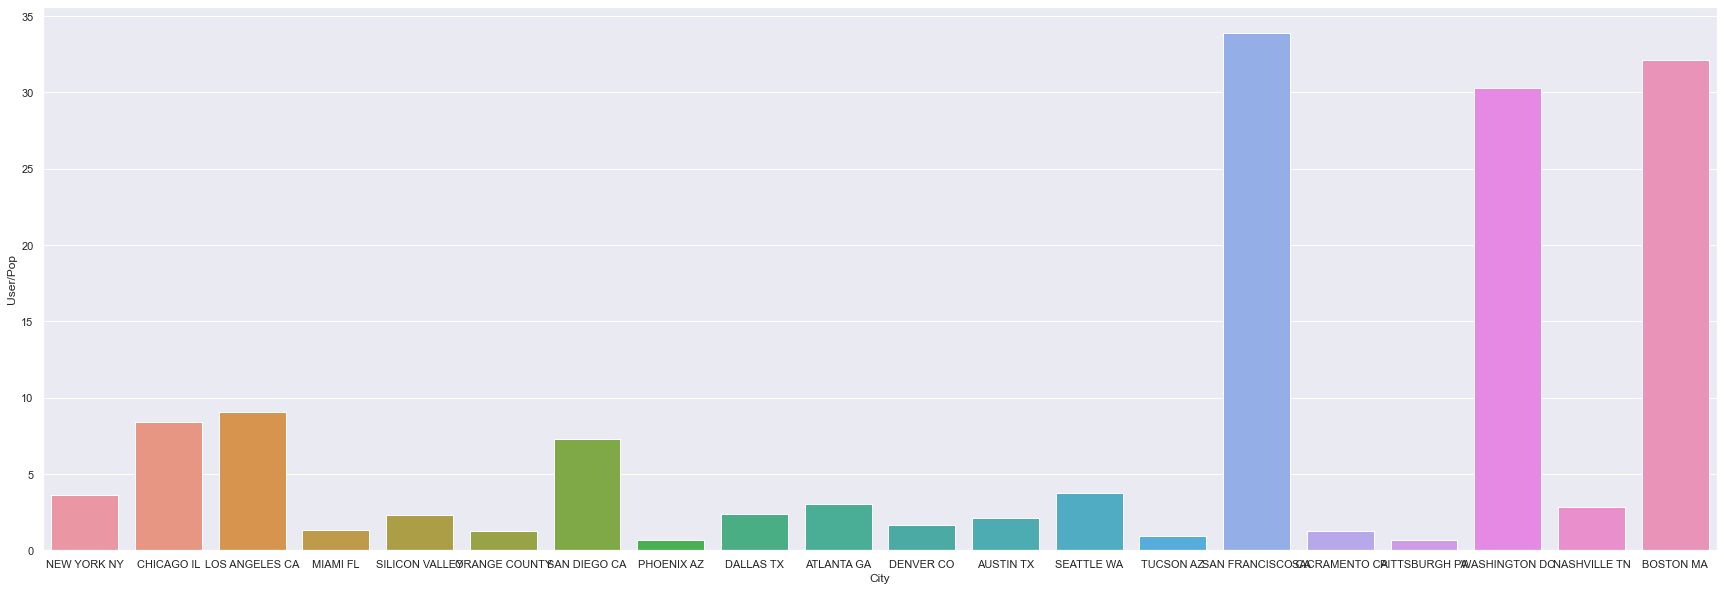

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks()
sns.barplot(x=city['City'],y=city['User/Pop'])

In [ ]:
high=merged_data[(merged_data['Income_(USD/Month)']>=25000)].groupby(['Company'])['Year'].sum()
low=merged_data[(merged_data['Income_(USD/Month)']<15000)].groupby(['Company'])['Year'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the higher the population the higher the number of users')
else:
    print('We accept null hypothesis that the higher the population the higher the users')
    
print('P value is ', p_value)

We accept null hypothesis that the higher the population the higher the users
P value is  0.2664038337675313


In [ ]:
high

Company
Pink Cab      15738954
Yellow Cab    50639770
Name: Year, dtype: int64

In [ ]:
low

Company
Pink Cab       87245576
Yellow Cab    283624113
Name: Year, dtype: int64

In [ ]:
high=merged_data[(merged_data['Population']>=1595037)].groupby(['City'])['Users'].sum()
low=merged_data[(merged_data['Population']<1595037)].groupby(['City'])['Users'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the higher the population the higher the number of users')
else:
    print('We accept null hypothesis that the higher the population the higher the users')
    
print('P value is ', p_value)

We accept alternate hyothesis that the higher the population the higher the number of users
P value is  8.476461176471075e-05


In [ ]:
high

City
CHICAGO IL         9313000500
LOS ANGELES CA     6923092356
NEW YORK NY       30180152865
Name: Users, dtype: int64

In [ ]:
low

City
ATLANTA GA         186665457
AUSTIN TX           73332288
BOSTON MA         2375983532
DALLAS TX          155475669
DENVER CO           47510325
MIAMI FL           114074450
NASHVILLE TN        27902700
ORANGE COUNTY       51742108
PHOENIX AZ          12658512
PITTSBURGH PA        4783259
SACRAMENTO CA       16673148
SAN DIEGO CA      1434057560
SEATTLE WA         200428811
SILICON VALLEY     232117193
TUCSON AZ           11029872
WASHINGTON DC     5554642737
Name: Users, dtype: int64

In [ ]:
#payments
high=merged_data[(merged_data['Payment_Mode']=="Card")].groupby(['Transaction_ID'])['Price_Charged'].sum()
low=merged_data[(merged_data['Payment_Mode']=="Cash")].groupby(['Transaction_ID'])['Price_Charged'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Cards are used for trips that cost more')
else:
    print('We accept null hypothesis that Cards are not used for trips that cost more')
    
print('P value is ', p_value)

We accept null hypothesis that Cards are not used for trips that cost more
P value is  0.8919986499028361


In [ ]:
high

Transaction_ID
10000011    370.95
10000012    358.52
10000015    114.62
10000017    576.15
10000018    466.10
             ...  
10440096    458.64
10440099    202.70
10440100    452.19
10440106    146.19
10440107    191.58
Name: Price_Charged, Length: 215504, dtype: float64

In [ ]:
low

Transaction_ID
10000013    125.20
10000014    377.40
10000016     72.43
10000019    191.61
10000020    156.98
             ...  
10440097    167.09
10440098    358.77
10440101     69.24
10440104    113.75
10440105    437.07
Name: Price_Charged, Length: 143888, dtype: float64

In [ ]:
high=merged_data[(merged_data['Price_Charged']>386)].groupby(['Price_Charged'])['Profit'].sum()
low=merged_data[(merged_data['Price_Charged']<386)].groupby(['Price_Charged'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that the higher the cost of trip the higher the profit')
else:
    print('We accept null hypothesis that the lower the cost of trip the higher the profit')
    
print('P value is ', p_value)

We accept alternate hypothesis that the higher the cost of trip the higher the profit
P value is  0.0


In [ ]:
high

Price_Charged
386.01      207.6228
386.02     1023.7114
386.03      539.9532
386.04      739.9632
386.05      679.9916
             ...    
1981.05    1424.1408
1993.83    1399.1100
2013.95    1433.3420
2016.70    1445.2720
2048.03    1463.9660
Name: Profit, Length: 63021, dtype: float64

In [ ]:
low

Price_Charged
15.60      -5.7840
15.75      -9.0300
16.38      -3.0000
16.53      -2.6700
16.76      -3.2220
            ...   
385.95    325.0428
385.96    157.8656
385.97    284.5012
385.98    -26.4948
385.99    326.9670
Name: Profit, Length: 36154, dtype: float64

In [ ]:
high=merged_data[(merged_data['KM_Travelled']>22)].groupby(['KM_Travelled'])['Profit'].sum()
low=merged_data[(merged_data['KM_Travelled']<22)].groupby(['KM_Travelled'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that the longer the distance of the  trip the higher the profit')
else:
    print('We accept null hypothesis that the shorter the distance of the trip the higher the profit')
    
print('P value is ', p_value)

We accept alternate hypothesis that the longer the distance of the  trip the higher the profit
P value is  1.4643646709969495e-124


In [ ]:
high

KM_Travelled
22.04     43960.6556
22.05     50827.9810
22.08     40142.2220
22.20     45738.2700
22.22     41147.1556
            ...     
46.41    100135.1454
46.80    203355.5160
47.20    115672.7500
47.60    111086.0740
48.00    104190.3500
Name: Profit, Length: 431, dtype: float64

In [ ]:
low

KM_Travelled
1.90       4029.8620
1.92       4132.3436
1.94       4173.1776
1.96       4554.1028
1.98       4794.3284
            ...     
21.66     47793.4796
21.78     47706.7704
21.80     46868.1320
21.84     35466.2708
21.85    102708.7500
Name: Profit, Length: 442, dtype: float64

In [ ]:
#cities dominated by two cab companies

high=merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['City'])['Profit'].sum()
low=merged_data[(merged_data['Company']=="Pink Cab")].groupby(['City'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that different cities are dominated by different companies')
else:
    print('We accept null hypothesis that that different cities are not dominated by a different company')
    
print('P value is ', p_value)

We accept null hypothesis that that different cities are not dominated by a different company
P value is  0.14465210120118369


In [ ]:
high

City
ATLANTA GA        7.463828e+05
AUSTIN TX         3.792557e+05
BOSTON MA         1.506718e+06
CHICAGO IL        3.068591e+06
DALLAS TX         1.104003e+06
DENVER CO         3.570001e+05
LOS ANGELES CA    3.285977e+06
MIAMI FL          5.960001e+05
NASHVILLE TN      8.524768e+04
NEW YORK NY       2.645108e+07
ORANGE COUNTY     3.550060e+05
PHOENIX AZ        1.573445e+05
PITTSBURGH PA     6.805822e+04
SACRAMENTO CA     6.200218e+04
SAN DIEGO CA      9.492737e+05
SEATTLE WA        4.919035e+05
SILICON VALLEY    9.764547e+05
TUCSON AZ         8.097112e+04
WASHINGTON DC     3.299104e+06
Name: Profit, dtype: float64

In [ ]:
low

City
ATLANTA GA          96050.076
AUSTIN TX          147445.290
BOSTON MA          262001.698
CHICAGO IL         318722.488
DALLAS TX           24730.112
DENVER CO           40584.939
LOS ANGELES CA    1125732.065
MIAMI FL           162301.191
NASHVILLE TN        64284.534
NEW YORK NY       1511474.388
ORANGE COUNTY      101995.833
PHOENIX AZ          35596.394
PITTSBURGH PA       17107.738
SACRAMENTO CA       55324.012
SAN DIEGO CA       637889.769
SEATTLE WA         112781.335
SILICON VALLEY     340250.531
TUCSON AZ           59289.575
WASHINGTON DC      193766.353
Name: Profit, dtype: float64

In [ ]:
#profits specific to 2 quarters
high=merged_data[(merged_data['Quarter']==3) | (merged_data['Quarter']==4)].groupby(['Quarter'])['Profit'].sum()
low=merged_data[(merged_data['Quarter']==2) | (merged_data['Quarter']==1)].groupby(['Quarter'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value>0.05):
    print('We accept alternate hypothesis that profits are higher in the last two quarters')
else:
    print('We accept null hypothesis that the profits are lower in the last two quarters')
    
print('P value is ', p_value)

We accept alternate hypothesis that profits are higher in the last two quarters
P value is  0.2423290978912571


In [ ]:
high

Quarter
3    1.242927e+07
4    1.438175e+07
Name: Profit, dtype: float64

In [ ]:
low

Quarter
1    1.038812e+07
2    1.212857e+07
Name: Profit, dtype: float64

In [ ]:
high=merged_data[(merged_data['Day_week']==5) | (merged_data['Day_week']==6 )].groupby(['Day_week'])['KM_Travelled'].mean()
low=merged_data[(merged_data['Day_week']!=5) | (merged_data['Day_week']!=6)].groupby(['Day_week'])['KM_Travelled'].mean()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that users on average  travel more on on paricular times of the week')
else:
    print('We accept null hypothesis that the users on average travel the same regardless of the day of week')
    
print('P value is ', p_value)

We accept null hypothesis that the users on average travel the same regardless of the day of week
P value is  0.6688373674673522


In [ ]:
high

Day_week
5    22.600371
6    22.467666
Name: KM_Travelled, dtype: float64

In [ ]:
low

Day_week
0    22.613886
1    22.492520
2    22.525932
3    22.601038
4    22.603830
5    22.600371
6    22.467666
Name: KM_Travelled, dtype: float64

In [ ]:
high=merged_data[(merged_data['Age']>35) ].groupby(['Age'])['Income_(USD/Month)'].mean()
low=merged_data[(merged_data['Age']<35)].groupby(['Age'])['Income_(USD/Month)'].mean()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the older you get the more you income you earn')
else:
    print('We accept null hypothesis that age does not affect income earnings')
    
print('P value is ', p_value)

We accept null hypothesis that age does not affect income earnings
P value is  0.5959357388889042


In [ ]:
high

Age
36    14820.639045
37    14935.443532
38    15279.539611
39    14803.957535
40    15322.262829
41    15037.353583
42    15267.277582
43    14791.964949
44    13589.974228
45    15070.394068
46    15098.381062
47    15921.856619
48    15300.495405
49    14418.510582
50    15106.645146
51    15488.610277
52    15642.129757
53    15914.796484
54    15486.252756
55    16204.590064
56    15367.160342
57    15509.325655
58    14863.849769
59    15169.719272
60    13442.733775
61    15082.159596
62    14738.510482
63    15203.425931
64    15192.488997
65    14822.581533
Name: Income_(USD/Month), dtype: float64

In [ ]:
low

Age
18    14464.733542
19    15054.463636
20    15525.407229
21    14727.257020
22    15204.666328
23    15178.889835
24    15235.124114
25    14921.252568
26    14860.173402
27    14527.868495
28    15365.240885
29    15381.830258
30    15633.302284
31    14640.433120
32    14858.851493
33    15167.050624
34    14484.427992
Name: Income_(USD/Month), dtype: float64

In [ ]:
high=merged_data[(merged_data['Year']==2018)].Year.value_counts()
low=merged_data[(merged_data['Year']==2017)].Year.value_counts()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that there has been an increase in the demand for cab use in the years')
else:
    print('We accept null hypothesis that there has not been an increase in demand for cabs in the years')
    
print('P value is ', p_value)

We accept null hypothesis that there has not been an increase in demand for cabs in the years
P value is  nan


C:\Users\prani\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\prani\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
high

2018    123206
Name: Year, dtype: int64

In [ ]:
low

2017    127964
Name: Year, dtype: int64

In [ ]:
high=merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Quarter'])['Users'].sum()
low=merged_data[(merged_data['Company']=="Pink Cab")].groupby(['Quarter'])['Users'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that different cities are dominated by different companies')
else:
    print('We accept null hypothesis that that different cities are not dominated by a different company')
    
print('P value is ', p_value)

We accept alternate hypothesis that different cities are dominated by different companies
P value is  0.0005106438105102132


In [ ]:
high

Quarter
1     8926025871
2    10309384684
3    12428898115
4    14612091284
Name: Users, dtype: int64

In [ ]:
low

Quarter
1    1760940884
2    2131795318
3    3093424181
4    3652763005
Name: Users, dtype: int64

In [ ]:
Recommendations:
    
    Number of Customers: Yellow cab has higher customer reach in 20 cities while pink cab has only in 4 cities
    Customer Retention: Yellow Cab has the highest customer retention ratio
    Age wise Reach: Yellow cab has customers in all age groups and it’s been observed that it’s even popular in the 60+ age group as equally as it’s in the 18-25 age group
    Average Profit per KM: Yellow cab’s average profit per KM is almost three times that of the pink cab
    Income wise Reach: yellow cab is offering their services to all the three-income class group
    Profit/KM Forecasting: Based on 2019 profit, pink cab’s profit has scope to improve while yellow cab’s profit is expected to fall based on average profit and loss rates

On analyzing the given dataset, we will suggest to invest XYZ company to invest in yellow cab.
    
    